In [7]:
import pymongo

# 连接数据库
db = pymongo.MongoClient("mongodb://localhost:27017/")

# 查询数据库中所有数据库的名称
db_names = db.list_database_names()
db_names

['admin',
 'config',
 'db_Weibo_SH0331',
 'db_Weibo_SH_0331_All',
 'db_tvcgR3',
 'db_weiboDB',
 'local',
 'test',
 'weiboInfoAll']

In [8]:
db_Weibo_SH0331 = db["db_Weibo_SH0331"]
col_names = db_Weibo_SH0331.list_collection_names()
col_names

['col_Weibo_SH0331']

## （1/2）下面根据每条记录的时间段将每条记录的`timePeriod`设置为对应的时段

In [17]:
# 依次查询每条记录
# 判断每条记录的date区间，根据当前记录所在区间设置它的timePeriod
# eg. "2022-03-31 02:59:00" 对应记录的 timePeriod 字段的值是2，表示当前记录是2点~3点之间发送的博文

eg_date = "2022-03-31 17:34:56" 
print(eg_date[-8:-6])

import pymongo
import sys
if __name__ == '__main__':
    
    # 连接数据库
    db = pymongo.MongoClient("mongodb://localhost:27017/")
    db_Weibo_SH0331 = db["db_Weibo_SH0331"]
    col_Weibo_SH0331 = db_Weibo_SH0331['col_Weibo_SH0331']
    
    progressBar = 0
    for eachRec in col_Weibo_SH0331.find():
        progressBar = progressBar + 1
        if progressBar % 20000 == 0:
            print("已处理" + str(progressBar) + "条记录！")
        id = eachRec['_id']
        date = eachRec['date']
        timePeriod = int(date[-8:-6])
        if not eachRec['timePeriod']:  # 判断当前字段的值是否为空，等同于( if eachRec['timePeriod'] == [] )
            col_Weibo_SH0331.update_one({'_id': id}, {'$set': {'timePeriod': timePeriod}})
    
    print("处理完毕，共处理" + str(progressBar) + "条记录！")

17
已处理20000条记录！
已处理40000条记录！
已处理60000条记录！
已处理80000条记录！
已处理100000条记录！
已处理120000条记录！
已处理140000条记录！
已处理160000条记录！
已处理180000条记录！
已处理200000条记录！
已处理220000条记录！
已处理240000条记录！
已处理260000条记录！
已处理280000条记录！
已处理300000条记录！
已处理320000条记录！
已处理340000条记录！
已处理360000条记录！
已处理380000条记录！
已处理400000条记录！
已处理420000条记录！
已处理440000条记录！
已处理460000条记录！
已处理480000条记录！
已处理500000条记录！
已处理520000条记录！
已处理540000条记录！
已处理560000条记录！
已处理580000条记录！
已处理600000条记录！
已处理620000条记录！
已处理640000条记录！
已处理660000条记录！
已处理680000条记录！
已处理700000条记录！
已处理720000条记录！
已处理740000条记录！
已处理760000条记录！
已处理780000条记录！
已处理800000条记录！
已处理820000条记录！
已处理840000条记录！
已处理860000条记录！
已处理880000条记录！
已处理900000条记录！
已处理920000条记录！
已处理940000条记录！
已处理960000条记录！
已处理980000条记录！
已处理1000000条记录！
已处理1020000条记录！
已处理1040000条记录！
处理完毕，共处理1055876条记录！


## （2/2）下面根据每条记录的时间段，分24个段，并创建24个集合
* 同时在每个集合中添加对应时段的记录
* 操作的数据库是：`db_Weibo_SH0331`
* 操作的集合是：`col_Weibo_SH0331`

In [18]:
import pymongo
import sys
import re

if __name__ == '__main__':
    
    # 连接数据库
    db = pymongo.MongoClient("mongodb://localhost:27017/")
    db_Weibo_SH0331 = db["db_Weibo_SH0331"]
    col_Weibo_SH0331 = db_Weibo_SH0331["col_Weibo_SH0331"]
    
    nowColName = db_Weibo_SH0331.list_collection_names()
    print("当前所有的集合------>")
    print(nowColName)
    
    # 循环新建24个集合（子表）
    subCol24 = list()
    subCol24.append(["col_weibo_timePeriod_" + str(period) for period in range(0, 24)])
    print(subCol24[0])
    print("=================== start...")
    colPackages = subCol24[0]
    
    # pattern = re.compile(r'\d+')  # 正则表达式挑出数字
    pattern = re.compile(r'([0-9]+)')
    
    for new_ColName in colPackages:
        
        if new_ColName in nowColName:
            print(new_ColName)
            print("当前集合已存在" + new_ColName + "，不再新建！")
            continue
        else:
            print("当前集合不存在" + new_ColName + "，可以新建！")
            
            # 新建集合的名字由col_weibo_timePeriod_ 和 对应的时间拼接而成
            hour = pattern.findall(new_ColName)  # e.g., col_weibo_timePeriod_0 表示的是0~1点的所有博文组成的集合
            
            # 获取timePeriod对应的字段 
            timePeriod = int(hour[0]) # 例如，对于col_weibo_timePeriod_6，需要查询的是timePeriod为6的所有记录
            print("--> 当前正在新建并添加" + str(timePeriod) + "点所有的博文数据库")
    
            # 这里是指 col_weibo_timePeriod_0 = db_Weibo_SH0331['col_weibo_timePeriod_0']
            exec(new_ColName + " =  db_Weibo_SH0331[new_ColName]")  # 选中指定数据库下的指定集合(没有则新建)
            
            queryCondition = {"timePeriod": timePeriod}   

            tempRecords = col_Weibo_SH0331.find(queryCondition)
            
            # 执行col_weibo_timePeriod1.insert_many(tempRecords)
            exec(new_ColName + ".insert_many(tempRecords)")  # 因为循环过程中，new_ColName会变，所以用exec命令执行
            
    print("=================== end...")
    nowColName = db_Weibo_SH0331.list_collection_names()
    print("新建完毕，当前所有的集合------>")
    print(nowColName)
    

当前所有的集合------>
['col_Weibo_SH0331']
['col_weibo_timePeriod_0', 'col_weibo_timePeriod_1', 'col_weibo_timePeriod_2', 'col_weibo_timePeriod_3', 'col_weibo_timePeriod_4', 'col_weibo_timePeriod_5', 'col_weibo_timePeriod_6', 'col_weibo_timePeriod_7', 'col_weibo_timePeriod_8', 'col_weibo_timePeriod_9', 'col_weibo_timePeriod_10', 'col_weibo_timePeriod_11', 'col_weibo_timePeriod_12', 'col_weibo_timePeriod_13', 'col_weibo_timePeriod_14', 'col_weibo_timePeriod_15', 'col_weibo_timePeriod_16', 'col_weibo_timePeriod_17', 'col_weibo_timePeriod_18', 'col_weibo_timePeriod_19', 'col_weibo_timePeriod_20', 'col_weibo_timePeriod_21', 'col_weibo_timePeriod_22', 'col_weibo_timePeriod_23']
=================== start...
当前集合不存在col_weibo_timePeriod_0，可以新建！
--> 当前正在新建并添加0点所有的博文数据库
当前集合不存在col_weibo_timePeriod_1，可以新建！
--> 当前正在新建并添加1点所有的博文数据库
当前集合不存在col_weibo_timePeriod_2，可以新建！
--> 当前正在新建并添加2点所有的博文数据库
当前集合不存在col_weibo_timePeriod_3，可以新建！
--> 当前正在新建并添加3点所有的博文数据库
当前集合不存在col_weibo_timePeriod_4，可以新建！
--> 当前正在新建并添加4点所有的博文

In [19]:
# 获取每个时段的记录总数目
periodNums = dict()
pattern = re.compile(r'([0-9]+)')

for new_ColName in colPackages:
    hour = pattern.findall(new_ColName)
    # value = col_weibo_timePeriod0.count_documents({})
    exec("value = " + new_ColName + ".count_documents({})")  # 打印该集合的记录总数
    
    periodNums[int(hour[0])] = value

print(periodNums)

{0: 69160, 1: 42241, 2: 20883, 3: 10741, 4: 9423, 5: 10409, 6: 20273, 7: 42653, 8: 78410, 9: 81770, 10: 75401, 11: 71259, 12: 64224, 13: 59789, 14: 47448, 15: 44225, 16: 42959, 17: 48605, 18: 35259, 19: 33904, 20: 36213, 21: 34712, 22: 36073, 23: 39842}


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[69160, 42241, 20883, 10741, 9423, 10409, 20273, 42653, 78410, 81770, 75401, 71259, 64224, 59789, 47448, 44225, 42959, 48605, 35259, 33904, 36213, 34712, 36073, 39842]


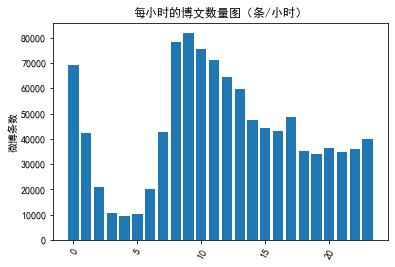

In [20]:
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # 防止字体乱码
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False

    items = list(periodNums.items())
    items.sort(key=lambda x: x[0], reverse=False)

    x1 = list(map(lambda x: x[0], items))
    y1 = list(map(lambda x: x[1], items))

    print(x1)
    print(y1)
    plt.bar(x1, y1)
    plt.xticks(rotation=60)  # 设置x轴上的刻度旋转角度
    plt.ylabel('时间段')
    plt.ylabel('微博条数')
    plt.title('每小时的博文数量图（条/小时）')

## 知识点学习记录 -- `exec()`初步使用示例
Code:
```python
new_field = "timePeriod_01"
# 自动新建变量的语句，很巧妙！！
exec(new_field + " = 'newVar'")  # 让系统执行语句： timePeriod_01 = 5，相当于新建了一个变量
print(new_field + " = " + eval(new_field)) # 打印出这个变量
```

Output: 
`timePeriod_01 = newVar`

In [23]:
new_var = 'a'
# print(a)  # NameError: name 'a' is not defined
exec(new_var + " = 2022")
print(a)  # 2022

2022
